In [1]:
%matplotlib inline

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import io
import codecs
import re
import folium
from dateutil import parser
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
from collections import Counter, defaultdict
from pykakasi import kakasi
from googletrans import Translator
sns.set(color_codes=True)

# Load data

In [2]:
today = datetime.date.today() - datetime.timedelta(2)
until = str(today)
print(until)

2018-06-04


In [3]:
# whether Iida=0 or Yawatahama=1
flag = 0
#flag = 1

In [4]:
if flag == 0:
    words = ['飯田市', '飯田線秘境駅', '飯田水引', '下栗の里', '遠山郷', 'りんご並木', 'しらびそ高原', '野底山森林公園']
else:
    words = ['八幡浜', 'マーマレード大会', 'どーや市場', 'どーや食堂', '日土小学校', 'アゴラマルシェ', 'もっきんろーど', '諏訪崎', 
         '平家谷', 'みなと湯', 'ゆめみかん', 'はまぽん']

In [5]:
Kakasi = kakasi()

Kakasi.setMode('H', 'a')
Kakasi.setMode('K', 'a')
Kakasi.setMode('J', 'a')

conv = Kakasi.getConverter()
YH_df = pd.DataFrame()
for word in words:
    df = pd.read_csv('tweet/' + until + '/' + conv.do(word) + '_' + until + '.csv', sep = '\t',encoding='utf-16')
    YH_df = pd.concat([YH_df, df])


# EDA

In [6]:
print("num of tweet: ", YH_df.shape[0])

num of tweet:  496


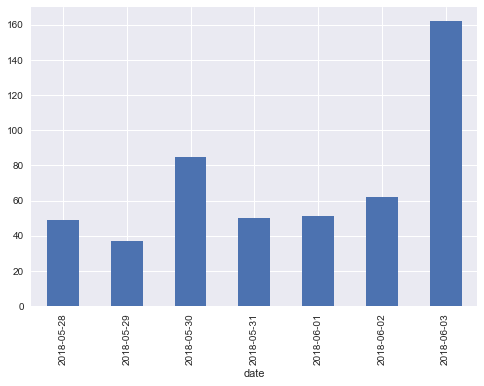

In [7]:
YH_df["date"] = pd.to_datetime(YH_df["created_at"], errors='coerce')
YH_df.groupby(YH_df["date"].dt.date).date.count().plot(kind="bar")

# WordCloud (only noun)

In [8]:
YH_df = YH_df[YH_df['text'].notnull()]

In [9]:
#半角英字
alphaReg = re.compile(r'^[a-zA-Z]+$')
def isalpha(s):
    return alphaReg.match(s) is not None

In [10]:
# janome 形態素分解
def janome_analysis(sentences, output, POS='名詞'):
    t = Tokenizer()
    words_count = defaultdict(int)
    words = []
    for sentence in sentences:
        tokens = t.tokenize(sentence)
        for token in tokens:
            # 品詞を取り出し
            partOfSpeech1 = token.part_of_speech.split(',')[0]
            partOfSpeech2 = token.part_of_speech.split(',')[1]
            
            if output == "normal":
                if partOfSpeech2 == '固有名詞' or partOfSpeech1 == '形容詞':
#                     if (token.base_form != ':' and 
#                         token.base_form != '@' and
#                         token.base_form != 'RT'):
    #                    token.base_form != '#' and 
    #                     token.base_form != '-' and
    #                     token.base_form != '/' and
    #                     token.base_form != '(' and
    #                     token.base_form != ')' and
    #                     token.base_form != '.'):
                    if isalpha(token.base_form) == False: 
                        words_count[token.base_form] += 1
                        words.append(token.base_form)
            elif output == "cloud":
                if partOfSpeech1 == POS:

                    words_count[token.base_form] += 1
                    words.append(token.base_form)
    return words_count, words

In [11]:
texts = YH_df['text'].str.replace('http\S+', '', case=False)
words_count, words = janome_analysis(texts, "cloud", "名詞")
text = ' '.join(words)

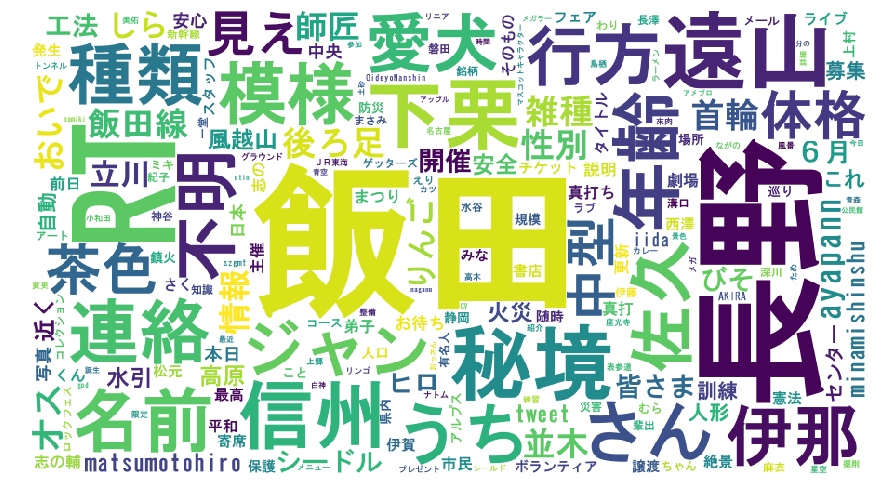

In [12]:
fpath = "C:\Windows\Fonts\HGRGE.TTC"
#word cloud
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("sample.png")
plt.show()

In [13]:
words_count2, words2 = janome_analysis(texts, "cloud", "形容詞")
text2 = ' '.join(words2)

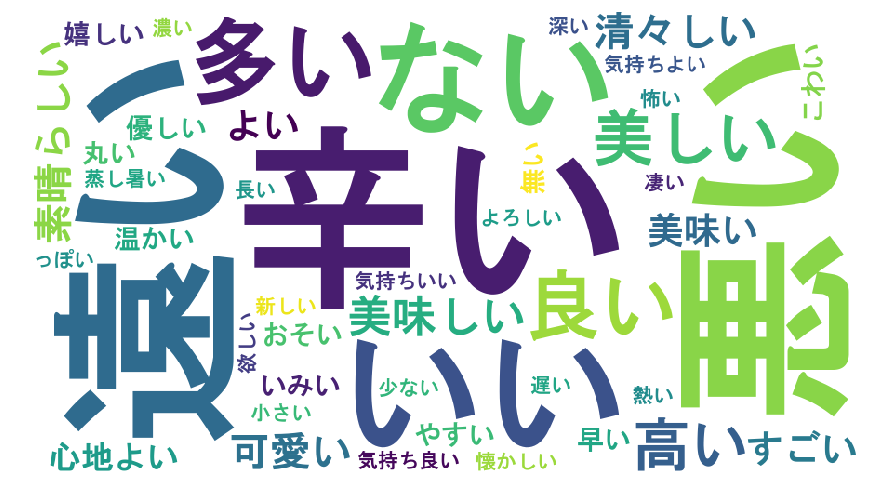

In [14]:
wordcloud2 = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(text2)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [15]:
words_count3, words3 = janome_analysis(texts, "cloud", "動詞")
text3 = ' '.join(words3)

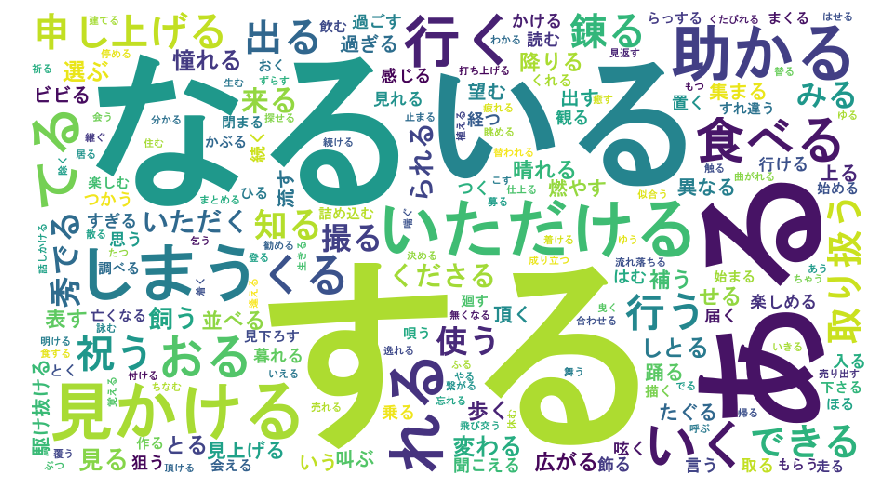

In [16]:
wordcloud3 = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(text3)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

# English version

In [33]:
translator = Translator()
a = translator.translate(words)
en_list = [word.text for word in a]
en_text = ' '.join(en_list)

wordcloud4 = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(en_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

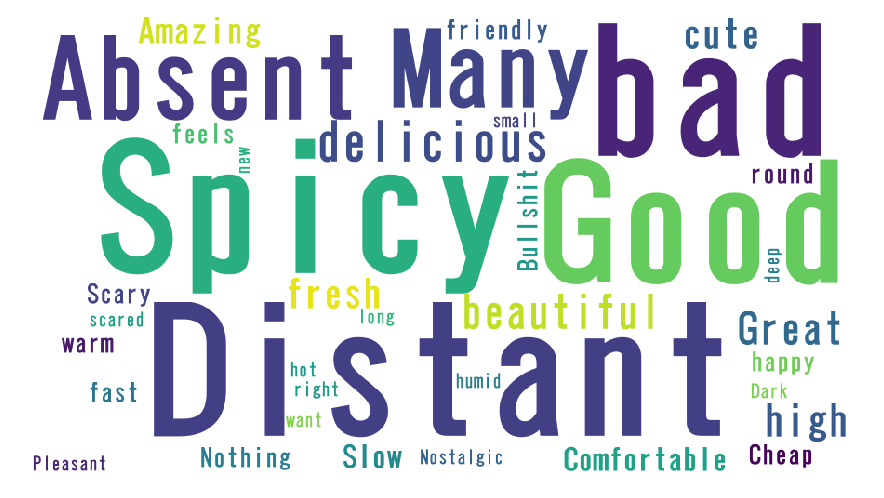

In [34]:
translator = Translator()
a = translator.translate(words2)
en_list = [word.text for word in a]
en_text = ' '.join(en_list)

wordcloud4 = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(en_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

In [35]:
translator = Translator()
a = translator.translate(words3)
en_list = [word.text for word in a]
en_text = ' '.join(en_list)

wordcloud4 = WordCloud(background_color="white", font_path=fpath, width=900, height=500, collocations=False).generate(en_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# Explore frequent word (proper nouns and adjective)

In [18]:
YH_wo_rt = YH_df[YH_df['RT']==False]
YH_wo_rt = YH_wo_rt['text'].str.replace('http\S+', '', case=False)

In [19]:
words_count5, words5 = janome_analysis(YH_wo_rt, "normal")

In [20]:
Counter(words3).most_common()[:5]

[('する', 146), ('なる', 98), ('いる', 66), ('ある', 62), ('いただける', 46)]

# Sentiment analysis

In [21]:
class CorpusElement:
    def __init__(self, text='', tokens=[], pn_scores=[]):
        self.text = text # テキスト本文
        self.tokens = tokens # 構文木解析されたトークンのリスト
        self.pn_scores = pn_scores # 感情極性値(後述)


# CorpusElementのリスト
naive_corpus = []

naive_tokenizer = Tokenizer()

for text in YH_wo_rt:
    tokens = naive_tokenizer.tokenize(text)
    element = CorpusElement(text, tokens)
    naive_corpus.append(element)

# 最初の1文章の形態素解析結果を表示
# for token in naive_corpus[0].tokens:
#     print(token)

In [22]:
# pn_ja.dicファイルから、単語をキー、極性値を値とする辞書を得る
def load_pn_dict():
    dic = {}
    
    with codecs.open('./pn_ja.dic', 'r', 'shift_jis') as f:
        lines = f.readlines()
        
        for line in lines:
            # 各行は"良い:よい:形容詞:0.999995"
            columns = line.split(':')
            dic[columns[0]] = float(columns[3])
            
    return dic

In [23]:
# トークンリストから極性値リストを得る
def get_pn_scores(tokens, pn_dic):
    scores = []
    
    for surface in [t.surface for t in tokens if t.part_of_speech.split(',')[0] in ['動詞','名詞', '形容詞', '副詞']]:
        if surface in pn_dic:
            scores.append(pn_dic[surface])
    
    if len(scores) == 0:
        scores.append(0)
    
    return scores

In [24]:
# 感情極性対応表のロード
pn_dic = load_pn_dict()

# 各文章の極性値リストを得る
for element in naive_corpus:
    element.pn_scores = get_pn_scores(element.tokens, pn_dic)

In [25]:
# 平均値が最も高い5件を表示
print('------------Show the 5 most postiive tweets------------------')
for element in sorted(naive_corpus, key=lambda e: sum(e.pn_scores)/len(e.pn_scores), reverse=True)[:5]:
    print('Score: {:.3f}'.format(sum(element.pn_scores)/len(element.pn_scores)))
    print('Text: {}'.format(io.StringIO(element.text).readline()))
    print('')


# 平均値が最も低い5件を表示
print('------------Show the 5 most negative tweets------------------')
for element in sorted(naive_corpus, key=lambda e: sum(e.pn_scores)/len(e.pn_scores))[:5]:
    print('Average: {:.3f}'.format(sum(element.pn_scores)/len(element.pn_scores)))
    print('Title: {}'.format(io.StringIO(element.text).readline()))
    print('')

#     for surface in [t.surface for t in element.tokens if t.part_of_speech.split(',')[0] in ['動詞','名詞', '形容詞', '副詞']]:
#         if surface in pn_dic:
#             print(surface)
    
#     print(element.pn_scores)
#     print('')

------------Show the 5 most postiive tweets------------------
Score: 0.160
Text: Blog更新しました。


Score: 0.143
Text: しらびそ高原


Score: 0.094
Text: 早くお元気になりますように。


Score: 0.082
Text: 長野県下栗の里


Score: 0.080
Text: 下栗の里。まさに天空の里。絶景でした。日本の里山って美しい…。 

------------Show the 5 most negative tweets------------------
Average: -0.806
Title: おはよう！飯田　薄雲が空を覆う #飯田市 #南信州 #薄雲 #蒸し暑い 

Average: -0.797
Title: チビクワガタ、ヒラクワガタ、コクワガタ、スジクワガタ、アカアシクワガタ、ノコギリクワガタ、ミヤマクワガタ、ルリクワガタ、信州の夏、クワガタの夏。 #下伊那 #飯田市

Average: -0.723
Title: 遠山郷ちゃーく


Average: -0.722
Title: 下栗の里で大豆植える人募集!


Average: -0.696
Title: 5/30。仕事。帰りに「鶏ハラミ塩ダレ焼き」連休に行った飯田線秘境駅冒険の写真を印刷。山、山、川、山、倒木、土砂崩れ、川、川、ダム、山、駅、山、川、川。。。ここから日記用に写真を選ぶ。生きていて良かった。



# Check the most retweeted tweet

In [26]:
for i in range(5):
    print('num of retweet: ', YH_df['text'].value_counts().tolist()[i])
    print(YH_df['text'].value_counts().index.tolist()[i])
    print('')
    print('------------------------------------------------------------------')

num of retweet:  42
RT @ayapann38: 5月11日からうちの愛犬が行方不明になってしまいました。長野県の方で見かけた方はご連絡いただければ助かります！
名前：ジャン
模様：白と茶色
体格、種類：中型犬、雑種
年齢：15才
性別：オス
青の首輪
目も見え辛く耳も遠い後ろ足が悪い
＃長野県…

------------------------------------------------------------------
num of retweet:  15
RT @matsumotohiro: 立川志の輔師匠の２番弟子、真打ちになった立川志の八師匠との二人会が６月６日（水）１９：００～　長野県飯田市の飯田人形劇場で！タイトルはそのものズバリ『ヒロさんと志の八真打を祝う会』です。お近くの皆さま、お待ち申し上げております。 https…

------------------------------------------------------------------
num of retweet:  14
RT @matsumotohiro: ６月９日（土）１５：００～長野県佐久市・佐久市民創錬センターにて『松元ヒロ笑ライブ』です。主催：平和の花さく９条の会。チケットも取り扱っている西澤書店にて前日の８日まで「憲法くんフェア」開催中！飯田の皆さまは伊賀良寄席に。そして佐久市のみな…

------------------------------------------------------------------
num of retweet:  10
RT @szgmt: 【#静岡豆知識】磐田市はその人口規模のわりに、有名人を多く輩出している。長澤まさみ、AKIRA、深川麻衣、神谷えりな、ゲッターズ飯田、水谷隼、伊藤美誠、溝口紀子など。他、アート系にも秀でた人が出ている。

------------------------------------------------------------------
num of retweet:  9
RT @minamishinshu: 掘削工法を変更か　ＪＲ東海、風越山トンネル巡り説明へ
https://t.co/K88gG8SZ00
#リニア中央新幹線　#ナトム工法　#シールド工法

# Plot the map

In [27]:
if flag == 0:
    Yawatahama_map = folium.Map(location=[35.5150, 137.8214], zoom_start=12)
else:
    Yawatahama_map = folium.Map(location=[33.4629, 132.4233], zoom_start=12)

In [28]:
YH_map_df = YH_df.dropna()

for i, r in YH_map_df.iterrows():
#   folium.Marker(location=[r['latitude'], r['longitude']], popup=r['text']).add_to(Yawatahama_map)
    folium.Marker(location=[r['latitude'], r['longitude']]).add_to(Yawatahama_map)
    
Yawatahama_map